In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.shape

(8693, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
((df.isna().sum(0)/df.shape[0])*100)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [6]:
df.shape

(8693, 14)

In [7]:
df2=df.drop(['PassengerId','Name','Cabin'],axis=1)

In [8]:
df2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
import numpy as np
df2["VIP"]=df2["VIP"].replace({"False":0,"True":1}).astype(np.float16)

In [10]:

df2["CryoSleep"]=df2["CryoSleep"].replace({"False":0,"True":1}).astype(np.float16)

In [11]:
df2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True


In [12]:
df2.groupby('HomePlanet')['Transported'].apply(lambda x:(x==1).sum()).reset_index(name='Number Transported')

,HomePlanet,Number Transported
0,Earth,1951
1,Europa,1404
2,Mars,920


In [20]:
from matplotlib import cm

count_transported=df2.groupby('Destination')['Transported'].apply(lambda x:(x==1).sum()).reset_index(name="Number Transported")
count_transported=count_transported.sort_values('Number Transported',ascending=False)


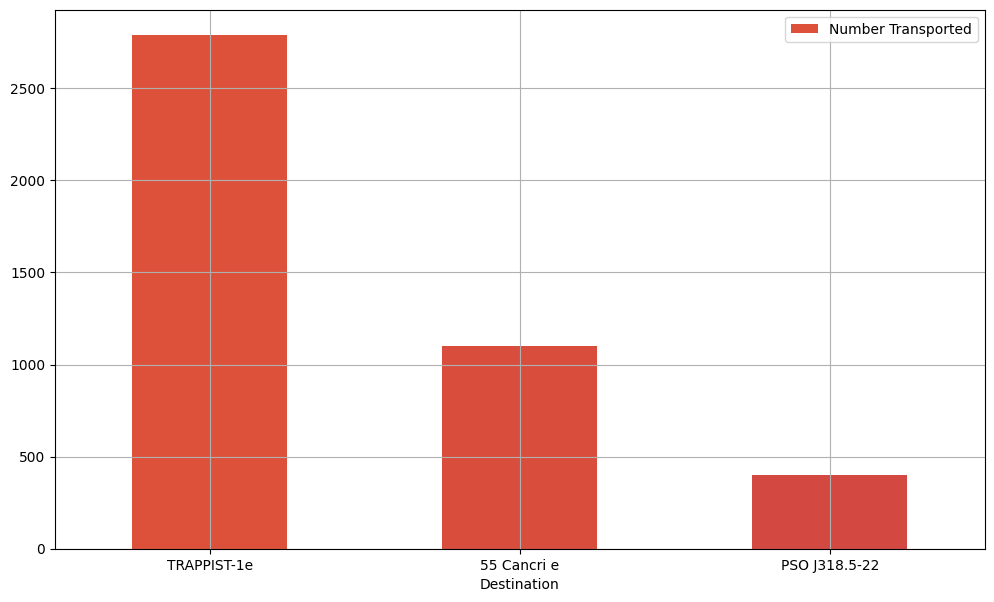

In [21]:
import matplotlib.pyplot as plt
count_transported.plot.bar(x='Destination',y='Number Transported',color=color,figsize=(12,7))
color=cm.inferno_r(np.linspace(0.4,0.8,30)) 
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [22]:
df2.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [23]:
df2.shape

(8693, 11)

In [24]:
df2.dropna()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0.0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,1.0,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,0.0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,0.0,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,False


In [26]:
df2[df2['Age']==0].shape

(178, 11)

In [27]:
df2.drop(df[df['Age']==0].index,axis=0,inplace=True)
df2.shape

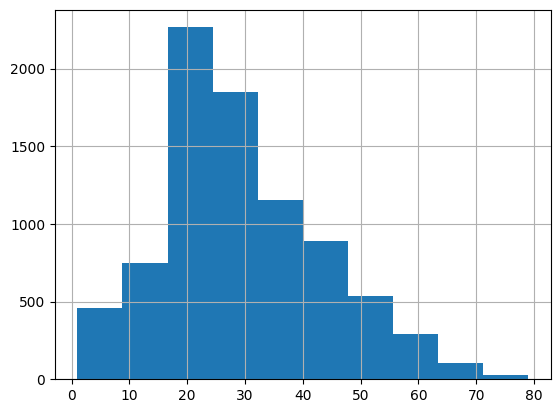

(29.443498080614205, 27.0)

In [29]:
df2['Age'].hist()
plt.show()
age_mean=df2['Age'].mean()
age_median=df2['Age'].median()
age_mean,age_median

In [31]:
df2['Age'].fillna(age_mean,inplace=True)

In [33]:
df2['Age'].isna().sum()

0

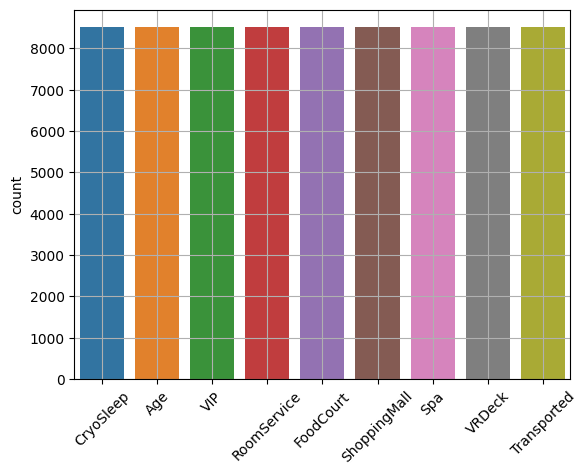

In [37]:
import seaborn as sns
sns.countplot(data=df2)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [39]:
df2['VIP'].fillna(0,inplace=True)

In [40]:
df2.VIP.isna().sum()

0

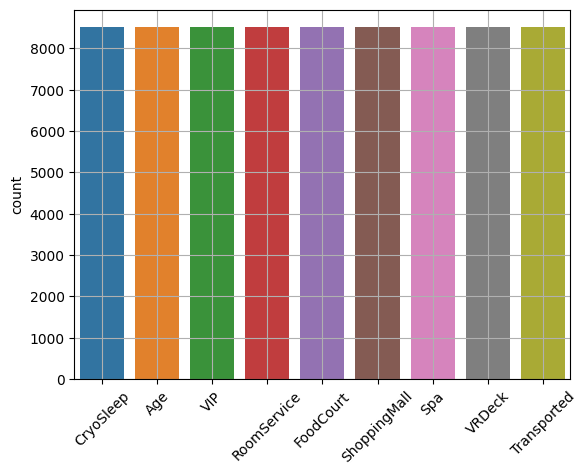

0.0    5335
1.0    2966
Name: CryoSleep, dtype: int64

In [43]:
sns.countplot(data=df2)
plt.xticks(rotation=45)
plt.grid()
plt.show()
df2['CryoSleep'].value_counts()

In [46]:
df2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].min()


RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [47]:
df2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].max()

RoomService     14327.0
FoodCourt       29813.0
ShoppingMall    23492.0
Spa             22408.0
VRDeck          24133.0
dtype: float64

In [48]:
df2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].mean()

RoomService     229.376469
FoodCourt       467.751020
ShoppingMall    177.323710
Spa             317.671386
VRDeck          311.184590
dtype: float64

In [49]:
for i in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    print(df2[i].value_counts())

0.0       5403
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1230.0       1
987.0        1
930.0        1
3097.0       1
1186.0       1
Name: RoomService, Length: 1273, dtype: int64
0.0       5280
1.0        116
2.0         75
4.0         53
3.0         53
          ... 
3206.0       1
3879.0       1
734.0        1
4076.0       1
2325.0       1
Name: FoodCourt, Length: 1507, dtype: int64
0.0       5415
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
2454.0       1
1770.0       1
871.0        1
9058.0       1
1031.0       1
Name: ShoppingMall, Length: 1115, dtype: int64
0.0       5149
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
1104.0       1
892.0        1
1559.0       1
777.0        1
2234.0       1
Name: Spa, Length: 1327, dtype: int64
0.0        5322
1.0         139
2.0          70
3.0          56
5.0          51
           ... 
8040.0        1
1920.0        1
5913.0        1
11213.0       1
1543.

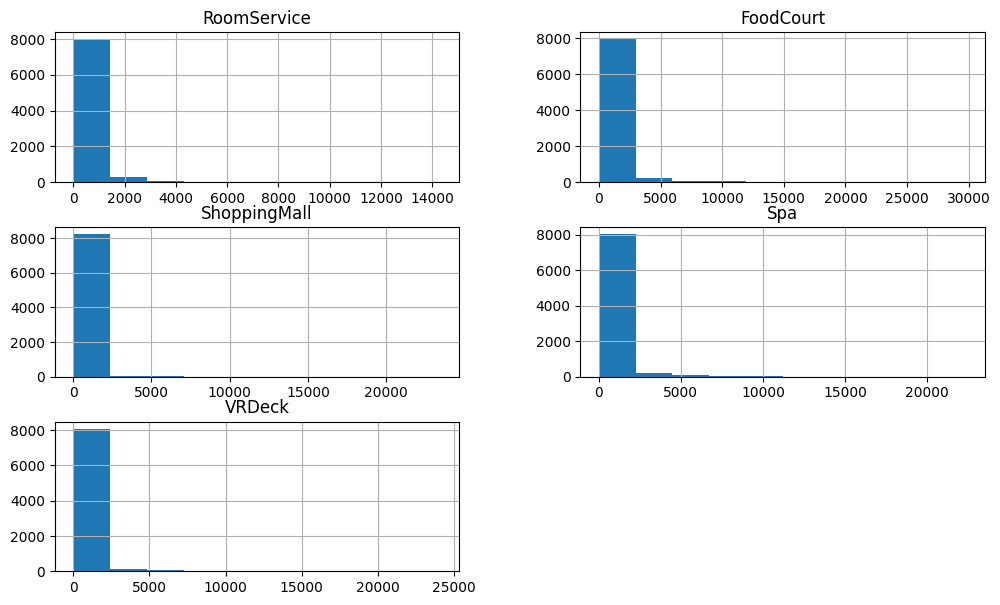

In [51]:
df2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].hist(figsize=(12,7))
plt.grid()
plt.show()

In [52]:
df2.fillna(0,inplace=True)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8515 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8515 non-null   object 
 1   CryoSleep     8515 non-null   float16
 2   Destination   8515 non-null   object 
 3   Age           8515 non-null   float64
 4   VIP           8515 non-null   float16
 5   RoomService   8515 non-null   float64
 6   FoodCourt     8515 non-null   float64
 7   ShoppingMall  8515 non-null   float64
 8   Spa           8515 non-null   float64
 9   VRDeck        8515 non-null   float64
 10  Transported   8515 non-null   bool   
dtypes: bool(1), float16(2), float64(6), object(2)
memory usage: 640.3+ KB


In [55]:
df2.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [57]:
df2.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.069923,-0.078833,-0.246352,-0.207767,-0.209657,-0.200066,-0.194422,0.468438
Age,-0.069923,1.000000,0.088897,0.056866,0.120819,0.021777,0.114770,0.092536,-0.051290
VIP,-0.078833,0.088897,1.000000,0.055578,0.124734,0.017524,0.060186,0.122338,-0.035682
RoomService,-0.246352,0.056866,0.055578,1.000000,-0.017117,0.050463,0.007374,-0.020494,-0.239609
FoodCourt,-0.207767,0.120819,0.124734,-0.017117,1.000000,-0.015408,0.220228,0.223373,0.049723
ShoppingMall,-0.209657,0.021777,0.017524,0.050463,-0.015408,1.000000,0.012958,-0.009423,0.013158
Spa,-0.200066,0.114770,0.060186,0.007374,0.220228,0.012958,1.000000,0.146388,-0.217490
VRDeck,-0.194422,0.092536,0.122338,-0.020494,0.223373,-0.009423,0.146388,1.000000,-0.203756
Transported,0.468438,-0.051290,-0.035682,-0.239609,0.049723,0.013158,-0.217490,-0.203756,1.000000


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8515 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8515 non-null   object 
 1   CryoSleep     8515 non-null   float16
 2   Destination   8515 non-null   object 
 3   Age           8515 non-null   float64
 4   VIP           8515 non-null   float16
 5   RoomService   8515 non-null   float64
 6   FoodCourt     8515 non-null   float64
 7   ShoppingMall  8515 non-null   float64
 8   Spa           8515 non-null   float64
 9   VRDeck        8515 non-null   float64
 10  Transported   8515 non-null   bool   
dtypes: bool(1), float16(2), float64(6), object(2)
memory usage: 640.3+ KB


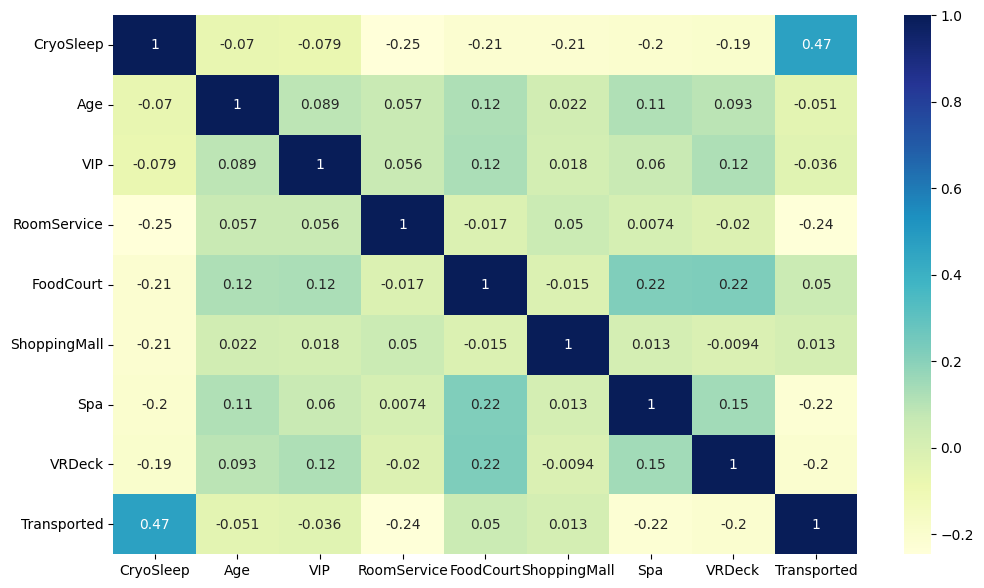

In [59]:
fig,ax=plt.subplots(figsize=(12,7))
sns.heatmap(df2.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [60]:
X_train=df2.drop('Transported',axis=1)
y_train=df2['Transported']

In [61]:
X_train.shape

(8515, 10)

In [62]:
y_train.shape

(8515,)

In [68]:
X_test=pd.read_csv('test.csv')
X_test['Cabin'].value_counts()

G/160/P     8
D/273/S     7
B/31/P      7
G/748/S     7
E/228/S     7
           ..
G/1322/P    1
F/108/P     1
G/1022/S    1
B/59/S      1
G/39/S      1
Name: Cabin, Length: 3265, dtype: int64

In [69]:
passenger=X_test['PassengerId']
X_test=X_test.drop(['PassengerId','Name','Cabin'],axis=1)

In [71]:
X_test['VIP']=X_test['VIP'].replace({'False':0,'True':1}).astype(np.float16)

In [75]:
X_test['CrysSleep']=X_test['CryoSleep'].replace({'False':0,'True':1}).astype(np.float16)

In [80]:
from sklearn import preprocessing
def encode_categories(features):
    le=preprocessing.LabelEncoder()
    for i in range(len(features)):
        X_test[features[i]]=le.fit_transform(X_test[features[i]])
        

In [83]:
encode_categories(['HomePlanet','Destination'])
age_mean=X_test['Age'].mean()
age_median=X_test['Age'].median()
X_test['Age'].fillna(age_mean,inplace=True)
X_test.fillna(0,inplace=True)

In [85]:
X_test.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CrysSleep       0
dtype: int64